<a href="https://colab.research.google.com/github/BaranikumarNagarajan/Emotion-Detection-using-NLP/blob/main/Emotion_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/content/Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
df.shape

(27481, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [7]:
df.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,6f7127d9d7,All this flirting going on - The ATG smiles...,good,neutral
freq,1,1,199,11118


In [8]:
df.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0


In [11]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


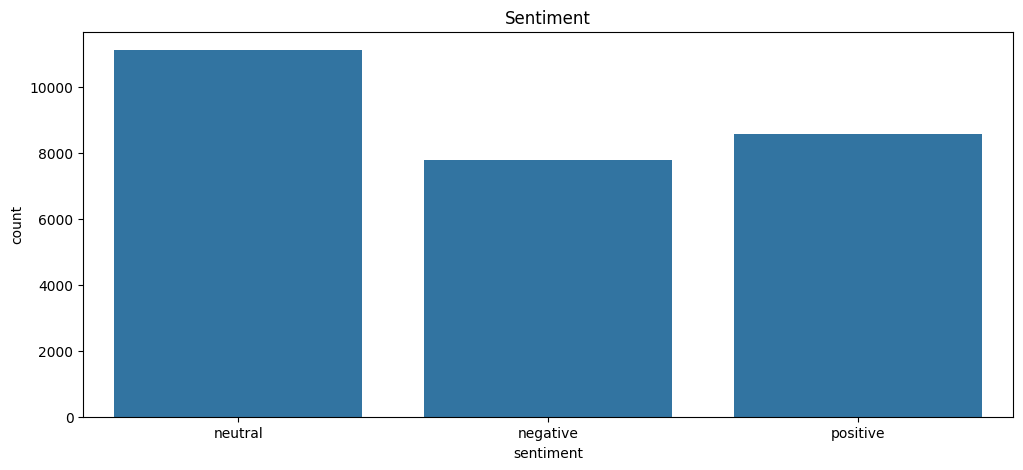

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df['sentiment'])
plt.title('Sentiment')
plt.show()

In [13]:
df.duplicated().any()

np.False_

In [14]:
from nltk.tokenize import word_tokenize
nltk.download('punkt') # Ensure punkt is downloaded
nltk.download('punkt_tab') # Keep this as suggested by the error
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet') # Download wordnet resource for lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
def cleansing(text):
    text_clean = text.lower()
    text_clean = re.sub(r'http\S+', '', text_clean)
    text_clean = re.sub(r'@[\w_]+', '', text_clean)
    text_clean = re.sub(r'#', '', text_clean)
    text_clean = re.sub(r'\d+', '', text_clean)
    text_clean = re.sub(r'[^\w\s]', ' ', text_clean)
    text_clean = re.sub(r'\s+', ' ', text_clean).strip()
    return text_clean

df['cleaned_text'] = df['text'].apply(cleansing)
display(df.head())

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,i d have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn t they put them on the rele...


In [16]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def process_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens


df['processed_text'] = df['text'].apply(process_text)

In [17]:
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
wordlem = WordNetLemmatizer()
def process_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    lemma_tokens = [wordlem.lemmatize(token) for token in filtered_tokens] # Corrected method name
    return lemma_tokens # Return lemma_tokens instead of stemmed_tokens

df['processed_text'] = df['text'].apply(process_text)

In [18]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text,processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,i d have responded if i were going,"[`, responded, ,, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego,"[Sooo, SAD, miss, San, Diego, !, !, !]"
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[bos, bullying, ...]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[interview, !, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn t they put them on the rele...,"[Sons, *, *, *, *, ,, `, put, release, already..."


In [19]:
df= df.drop(['textID','selected_text','text'], axis=1)

In [20]:
df.head()

,sentiment,cleaned_text,processed_text
0,neutral,i d have responded if i were going,"[`, responded, ,, going]"
1,negative,sooo sad i will miss you here in san diego,"[Sooo, SAD, miss, San, Diego, !, !, !]"
2,negative,my boss is bullying me,"[bos, bullying, ...]"
3,negative,what interview leave me alone,"[interview, !, leave, alone]"
4,negative,sons of why couldn t they put them on the rele...,"[Sons, *, *, *, *, ,, `, put, release, already..."


In [21]:
df.tail()

,sentiment,cleaned_text,processed_text
27476,negative,wish we could come see u on denver husband los...,"[wish, could, come, see, u, Denver, husband, l..."
27477,negative,i ve wondered about rake to the client has mad...,"[`, wondered, rake, ., client, made, clear, .N..."
27478,positive,yay good for both of you enjoy the break you p...,"[Yay, good, ., Enjoy, break, -, probably, need..."
27479,positive,but it was worth it,"[worth, *, *, *, *, .]"
27480,neutral,all this flirting going on the atg smiles yay ...,"[flirting, going, -, ATG, smile, ., Yay, ., (,..."


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [23]:
df.head()

,sentiment,cleaned_text,processed_text
0,1,i d have responded if i were going,"[`, responded, ,, going]"
1,0,sooo sad i will miss you here in san diego,"[Sooo, SAD, miss, San, Diego, !, !, !]"
2,0,my boss is bullying me,"[bos, bullying, ...]"
3,0,what interview leave me alone,"[interview, !, leave, alone]"
4,0,sons of why couldn t they put them on the rele...,"[Sons, *, *, *, *, ,, `, put, release, already..."


In [42]:
df.tail()

,sentiment,cleaned_text,processed_text
27476,0,wish we could come see u on denver husband los...,"[wish, could, come, see, u, Denver, husband, l..."
27477,0,i ve wondered about rake to the client has mad...,"[`, wondered, rake, ., client, made, clear, .N..."
27478,2,yay good for both of you enjoy the break you p...,"[Yay, good, ., Enjoy, break, -, probably, need..."
27479,2,but it was worth it,"[worth, *, *, *, *, .]"
27480,1,all this flirting going on the atg smiles yay ...,"[flirting, going, -, ATG, smile, ., Yay, ., (,..."


In [24]:
df['sentiment'].value_counts()

,count
sentiment,
1,11117
2,8582
0,7781


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment'], test_size=0.2, random_state=42)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train.apply(lambda x: ' '.join(x)))
x_test_tfidf = vectorizer.transform(x_test.apply(lambda x: ' '.join(x)))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6879548762736536
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63      1572
           1       0.63      0.75      0.68      2236
           2       0.78      0.71      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.70      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496

Confusion Matrix:
 [[ 898  587   87]
 [ 301 1678  257]
 [  66  417 1205]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = SVC()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6921397379912664
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.53      0.62      1572
           1       0.62      0.80      0.70      2236
           2       0.80      0.70      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.72      0.68      0.69      5496
weighted avg       0.71      0.69      0.69      5496

Confusion Matrix:
 [[ 837  654   81]
 [ 223 1792  221]
 [  51  462 1175]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7066957787481805
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.58      0.65      1572
           1       0.67      0.74      0.70      2236
           2       0.74      0.77      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.72      0.70      0.70      5496
weighted avg       0.71      0.71      0.70      5496

Confusion Matrix:
 [[ 915  515  142]
 [ 260 1663  313]
 [  62  320 1306]]


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a simpler search space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Randomized Search setup
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,             # Try 20 random combinations
    cv=3,                  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1              # Use all cores
)

# Run the search
random_search.fit(x_train_tfidf, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78dfe56f5c10>},
                   random_state=42, verbose=2)

In [32]:
best_model = random_search.best_estimator_

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(x_test_tfidf)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7036026200873362
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.59      0.65      1572
     neutral       0.67      0.73      0.70      2236
    positive       0.74      0.78      0.76      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.70      0.70      5496
weighted avg       0.71      0.70      0.70      5496

Confusion Matrix:
 [[ 924  507  141]
 [ 283 1632  321]
 [  63  314 1311]]


In [41]:
import joblib

# Save
joblib.dump(best_model, "best_rf_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# Load later like this
# best_model = joblib.load("best_rf_model.pkl")
# tfidf = joblib.load("tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

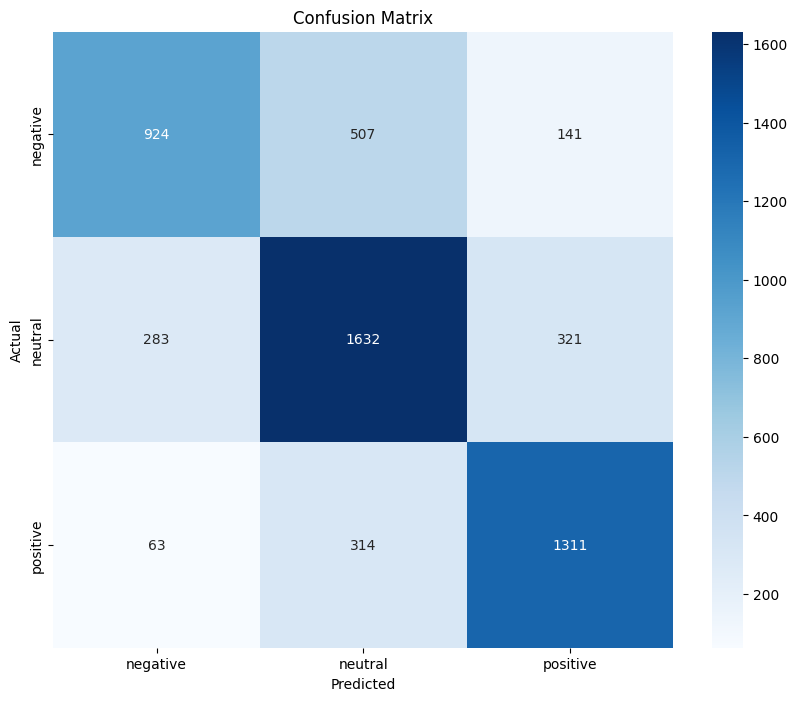

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
